<a href="https://colab.research.google.com/github/KaushikDasarii/kaushik/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Handling Missing values

import seaborn as sns

df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Checking missing values

print(df.isnull())

df.isnull().sum()

     survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
0    False      

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# delete the rows to handle missing valuies
# not  agood practice
df = df.dropna()
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
# to delete column wise

df = df.dropna(axis=1)
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
## Filling With mean
import seaborn as sns

df=sns.load_dataset('titanic')
df['Age_Median']=df['age'].fillna(df['age'].mean())


df[['Age_Median','age']]

,Age_Median,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [ ]:
# Medain value - For normal distributed data

# Outliers are present
import seaborn as sns

df=sns.load_dataset('titanic')

df['Age_Median']=df['age'].fillna(df['age'].median())

df[['Age_Median','age']]

,Age_Median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


In [ ]:
# Embarked is missing completely at random
#categorcal value
import seaborn as sns

df=sns.load_dataset('titanic')

df['embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['embarked'].notna()

,embarked
0,True
1,True
2,True
3,True
4,True
...,...
886,True
887,True
888,True
889,True


In [ ]:
df['embarked_mode']=df['embarked'].fillna(df['embarked'].mode()[0])

In [ ]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [ ]:
df['embarked_mode'].isnull().sum()

np.int64(0)

In [ ]:
df['embarked'].isnull().sum()

np.int64(2)

In [ ]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embarked_mode
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,S
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,S


In [ ]:
## Handling imbalanced Dataset

## To handle we have two techniques
##1) Oversampling
##2) Undersampling

import numpy as np
import pandas as pd

np.random.seed(123)

n_sample=1000

class_0_ratio=0.9
n_class_0=int(n_sample*class_0_ratio)
n_class_1=n_sample-n_class_0

In [ ]:
#CREATE MY DATAFRAME WITH IMBALANCED DATASET

class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})
class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

In [ ]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [ ]:
#Up sampling
from sklearn.utils import resample
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

df_minority_upsampled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [ ]:
df_minority_upsampled.shape

(900, 3)

In [ ]:
pd.concat([df_minority_upsampled,df_majority]).reset_index(drop=True)

,feature_1,feature_2,target
0,2.905343,1.495151,1
1,2.000977,1.814833,1
2,1.927957,2.280911,1
3,2.819483,2.964646,1
4,2.456515,1.833528,1
...,...,...,...
1795,-0.896718,2.540514,0
1796,0.812571,-0.082706,0
1797,0.637361,0.444621,0
1798,0.332712,1.896404,0


In [ ]:
#Down sampling
# NOT MUCH EFFICENT THEN UP SAMPLINGl
class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})
class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

df=pd.concat([class_0,class_1]).reset_index(drop=True)
from sklearn.utils import resample
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]
## REPLACE IS NOT USED BECAUSE WE ARE DECREAING THE POINTS
df_majority_upsampled=resample(df_minority,n_samples=len(df_minority),random_state=42)
pd.concat([df_majority_upsampled,df_minority]).reset_index(drop=True)

,feature_1,feature_2,target
0,2.701255,0.056481,1
1,2.322342,3.289170,1
2,2.500618,1.338170,1
3,1.922944,2.907951,1
4,0.630218,0.982405,1
...,...,...,...
195,2.720690,1.978489,1
196,1.949078,3.709793,1
197,2.709784,3.324917,1
198,1.817689,1.549237,1


Handling imbalanced data sets using SMOTE

SMOTE--SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE

IT IS A TECH USED IN ML TO ADDRESS IMBALANCED DATA SETS WHERE THE MINORITY CLASS HAS SIGNIFICANTLY FEWER INSTANCES THAN THE MAJORITY CLASS.IT INVOLVES GENERATING SYNTHETIC INSTANCES OF THR MINORITY CLASS BY INTERPOLATING BW EXISTING INSTANCES

In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [ ]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
finall_df=pd.concat([df1,df2],axis=1)
finall_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [ ]:
finall_df['target'].value_counts()

,count
target,
0,900
1,100


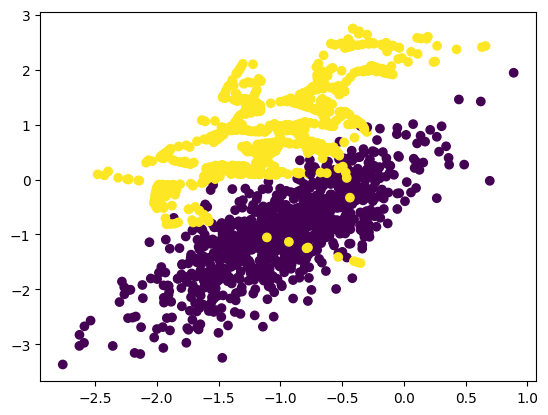

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(finall_df['f1'],finall_df['f2'],c=finall_df['target'])
plt.show()

In [ ]:
# to apply smote we use imlearn

!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

# tranform the dataset using smote

oversample=SMOTE()
# There is also a typo in the method name, it should be `fit_resample`
X,y=oversample.fit_resample(finall_df[['f1','f2']],finall_df['target'])
y.shape
X.shape

(1800, 2)

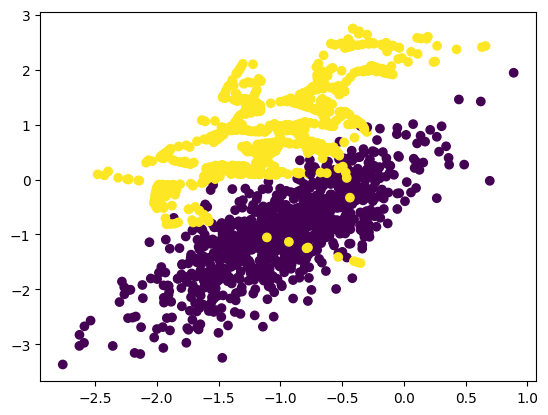

In [ ]:


import matplotlib.pyplot as plt
# Use the resampled data X and y for plotting
# X[:, 0] accesses the first column of the X array (feature 'f1')
# X[:, 1] accesses the second column of the X array (feature 'f2')
# y contains the resampled target variable
plt.scatter(X['f1'], X['f2'], c=y)
plt.show()

In [ ]:
#Handling outliers with Boxplot

import numpy as np
lst_marks=[23,43,54,65,76,87,89,35,46,58,37,45]
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.5,0.75,1])
print(minimum,Q1,median,Q3,maximum)

23.0 41.5 50.0 67.75 89.0


In [ ]:
IQR=Q3-Q1
print(IQR)

26.25


In [ ]:
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound,upper_bound)

2.125 107.125


<Axes: >

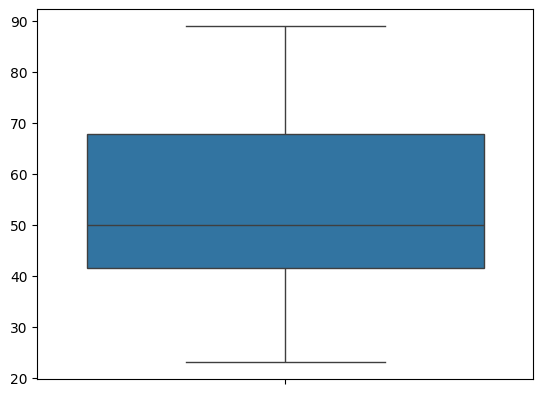

In [ ]:
import seaborn as sns
lst_marks=[23,43,54,65,76,87,89,35,46,58,37,45]
sns.boxplot(lst_marks)

<Axes: >

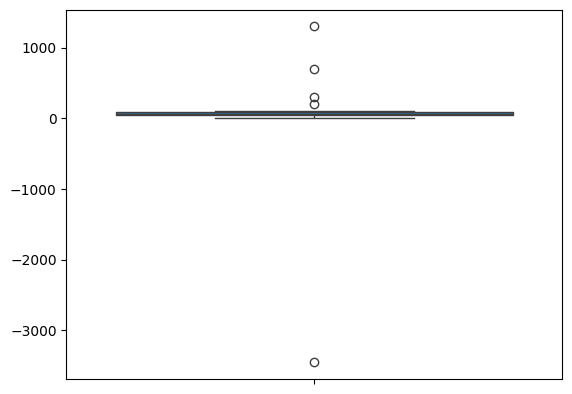

In [ ]:
lst_marks=[-3455,1,23,43,54,65,76,87,89,35,46,58,37,45,99,300,200,1300,700]
sns.boxplot(lst_marks)

Data encoing

1)Nomial/OHE encoding---- One Hot Encoding
2)Label and Ordinal Encoding
3)target guided ordinal encoding



Degree
B.E
PHD
Master
These are categorical values

changing them into numerical values is called DATA ENCODING

In [ ]:
## OHE

## Not used when there are large categorial values

# Categorial values are reprented in the binary form   EX:red--1 0 0 etc

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# create a simple data frame
df=pd.DataFrame({
    'color':['red','blue','green','green','red','blue']
})
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [ ]:
# Instantiate the OneHotEncoder
encoder=OneHotEncoder()
# Fit and transform the 'color' column
encoded=encoder.fit_transform(df[['color']]).toarray()
encoded

# You can convert the encoded output to a dense array or a DataFrame if needed
# print(encoded.toarray())
# print(pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['color'])))

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
pd.concat([df,encoder_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [ ]:
# label Encoding
# unique numercial value is applied
import pandas as pd
from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()
df=pd.DataFrame({
    'color':['red','blue','green','green','red','blue']
})
df.head()
df['color_label']=lbl_encoder.fit_transform(df['color'])
df


,color,color_label
0,red,2
1,blue,0
2,green,1
3,green,1
4,red,2
5,blue,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder(categories=[['small','medium','large']])
df=pd.DataFrame({
    'size':['small','medium','large','medium','small','large']
})
df.head()
df['size_label']=encoder.fit_transform(df[['size']])
df

,size,color_label
0,small,0.0
1,medium,1.0
2,large,2.0
3,medium,1.0
4,small,0.0
5,large,2.0


In [ ]:
## for large categorail values

import pandas as pd
df=pd.DataFrame({
    'city':['New York','London','Paris','Tokyo','New York','Paris'],
    'price':[200,150,300,250,150,300]
})
df.head()

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,150


In [ ]:
mean_price=df.groupby('city')['price'].mean().to_dict()
mean_price

{'London': 150.0, 'New York': 175.0, 'Paris': 300.0, 'Tokyo': 250.0}

In [ ]:
df['city_encoded']=df['city'].map(mean_price)
df

,city,price,city_encoded
0,New York,200,175.0
1,London,150,150.0
2,Paris,300,300.0
3,Tokyo,250,250.0
4,New York,150,175.0
5,Paris,300,300.0
